In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import time, datetime
import wave

In [360]:
with open('in_the_spring.pcm', 'rb') as f:
    data = np.fromfile(f, np.int16)

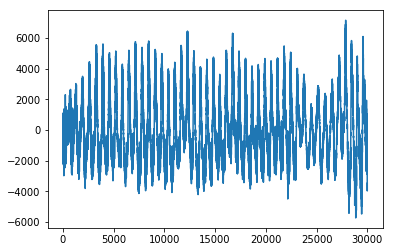

In [359]:
plot_data = data[70000:100000]
plt.figure()
plt.plot(range(0, len(plot_data)), plot_data)
plt.show()

In [27]:
x = 200

In [28]:
y = 100 if x > 100 else x

In [29]:
y

100

In [3]:
with open('in_the_spring.json', 'rb') as f:
    data = json.loads(f.read())

In [294]:
segments = data['segments']

In [295]:
segments[81]

{'confidence': 0.661,
 'duration': 0.26635,
 'loudness_max': -10.249,
 'loudness_max_time': 0.04207,
 'loudness_start': -16.67,
 'pitches': [0.041,
  0.17,
  0.015,
  0.125,
  0.086,
  0.123,
  1,
  0.087,
  0.027,
  0.212,
  0.036,
  0.437],
 'start': 26.10526,
 'timbre': [47.615,
  -2.738,
  59.347,
  15.832,
  43.139,
  -7.554,
  -8.256,
  -3.58,
  -22.504,
  15.001,
  -30.06,
  -7.672]}

* 1、loudness（音强） -> 亮度
* 2、pitches（音调 dou、rai、mi、fa、sou...） -> 饱和度、颜色浓淡
* 3、timbre（音色、三原色原理） -> 颜色、区分不同乐器、不同声带
* 2和3是否互换更好

In [14]:
loudmax = []
for i in segments:
    loudmax.append(i['loudness_max'])
loudmax = np.array(loudmax)    

In [94]:
# 归一化到0-100之间
k = 100/(loudmax.max() - loudmax.min())
b = 100*loudmax.min()/(loudmax.min() - loudmax.max())
loudmax = k * loudmax + b

In [95]:
loudmax.min(), loudmax.max()

(0.0, 100.0)

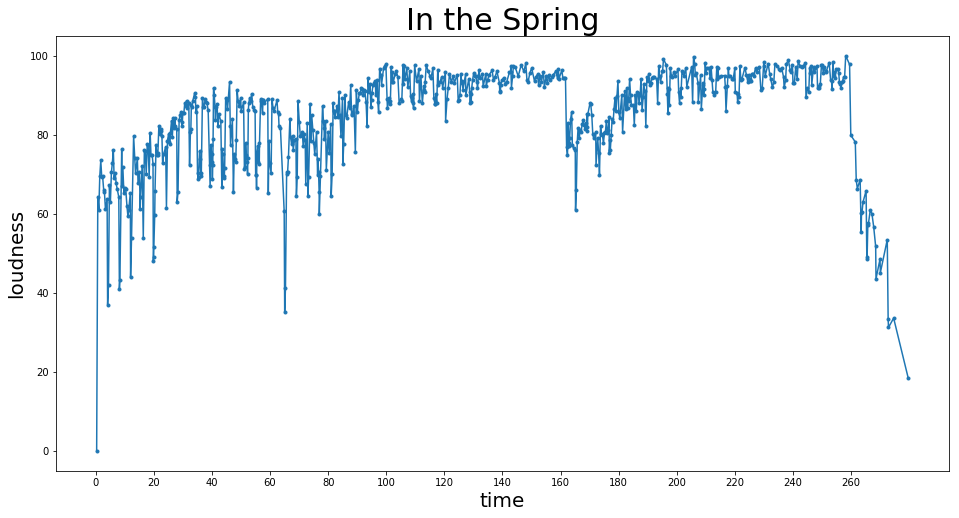

In [155]:
plt.figure(figsize=(16,8))
plt.plot(duration.cumsum(), loudmax, '.-')
plt.xticks(np.arange(0,duration.cumsum()[-1], step=20), rotation=0)
plt.xlabel('time', fontsize=20)
plt.ylabel('loudness', fontsize=20)
plt.title('In the Spring', fontsize=30)
plt.show()

In [46]:
pitches = []
for i in segments:
    pitches.append(i['pitches'])
pitches = np.array(pitches)    

In [250]:
pitches

array([[0.712, 0.969, 1.   , ..., 0.177, 0.229, 0.689],
       [0.238, 0.017, 0.015, ..., 0.194, 0.35 , 1.   ],
       [0.087, 1.   , 0.101, ..., 0.018, 0.01 , 0.02 ],
       ...,
       [0.736, 0.557, 0.066, ..., 0.055, 0.029, 1.   ],
       [0.018, 0.007, 0.011, ..., 0.007, 0.014, 0.627],
       [0.026, 0.011, 0.017, ..., 0.01 , 0.023, 0.485]])

In [261]:
pitches.sum(axis=1).reshape(-1,1)

array([[6.334],
       [2.069],
       [1.399],
       [2.198],
       [4.344],
       [1.687],
       [1.505],
       [3.558],
       [1.515],
       [2.081],
       [1.577],
       [4.551],
       [5.174],
       [1.619],
       [1.706],
       [2.088],
       [5.355],
       [2.557],
       [1.658],
       [3.023],
       [1.354],
       [3.579],
       [2.113],
       [3.61 ],
       [4.167],
       [1.853],
       [6.692],
       [1.728],
       [1.842],
       [1.824],
       [2.34 ],
       [1.58 ],
       [1.884],
       [2.646],
       [2.656],
       [2.38 ],
       [3.121],
       [1.604],
       [5.161],
       [2.177],
       [2.573],
       [2.239],
       [2.023],
       [2.971],
       [3.225],
       [3.233],
       [2.961],
       [2.255],
       [2.392],
       [1.285],
       [3.173],
       [1.526],
       [1.4  ],
       [1.931],
       [1.457],
       [4.369],
       [1.803],
       [2.801],
       [2.432],
       [3.   ],
       [2.731],
       [3.55 ],
       [

In [335]:
(pitches / pitches.sum(axis=1).reshape(-1,1))[81]

array([0.01738025, 0.07206443, 0.00635863, 0.05298855, 0.03645613,
       0.05214074, 0.42390844, 0.03688003, 0.01144553, 0.08986859,
       0.0152607 , 0.18524799])

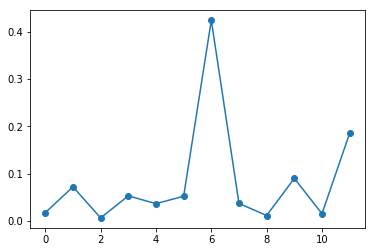

In [340]:
plt.plot((pitches / pitches.sum(axis=1).reshape(-1,1))[81], '-o')
plt.show()

0 index,  time 0.34222


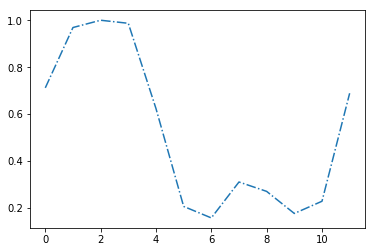

1 index,  time 0.73723


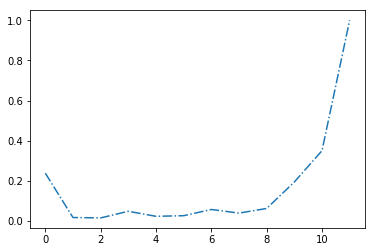

2 index,  time 1.0804500000000001


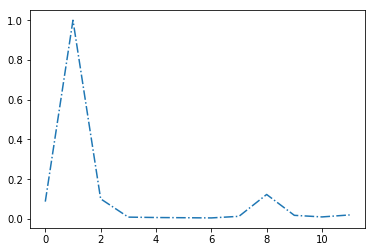

3 index,  time 1.4221300000000001


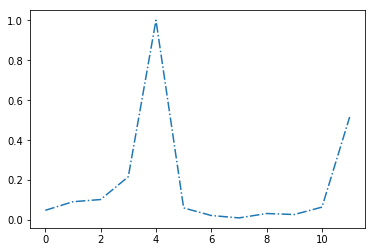

4 index,  time 1.75818


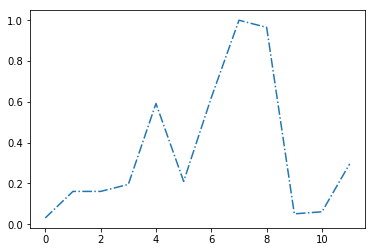

5 index,  time 2.09491


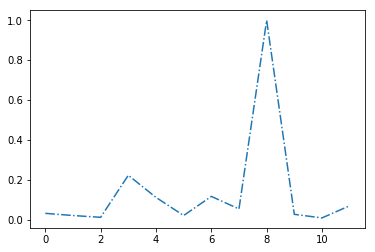

6 index,  time 2.36852


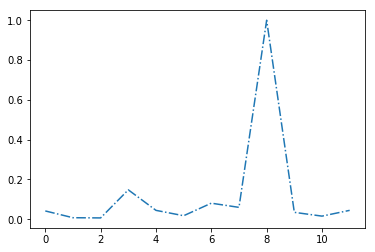

7 index,  time 2.77455


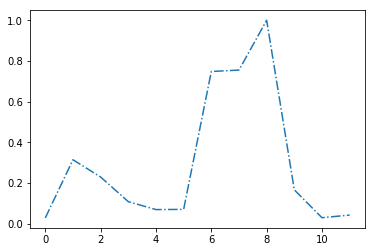

8 index,  time 3.01863


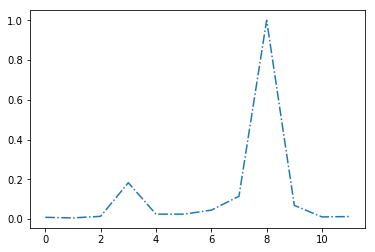

9 index,  time 3.37119


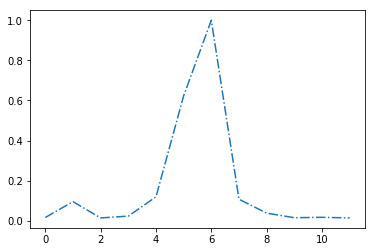

10 index,  time 3.94135


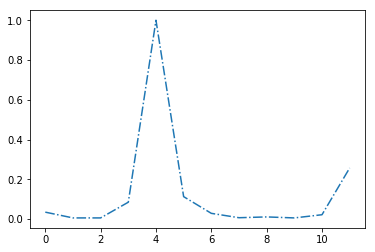

11 index,  time 4.10992


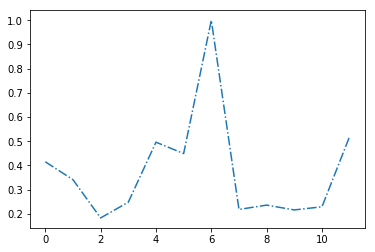

12 index,  time 4.41799


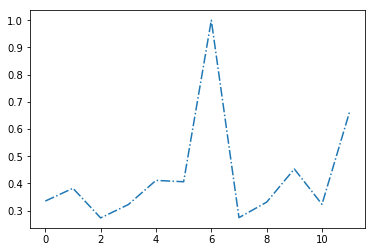

13 index,  time 4.736809999999999


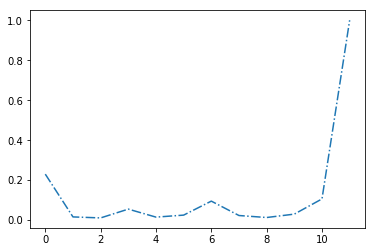

14 index,  time 5.0723199999999995


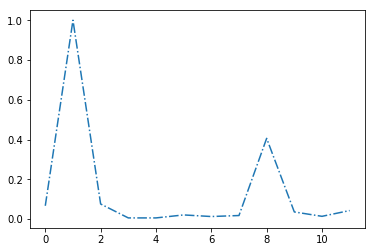

15 index,  time 5.416269999999999


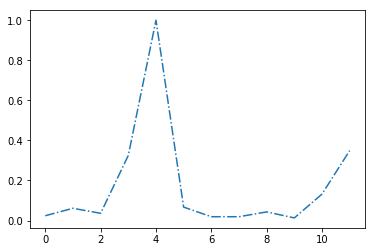

16 index,  time 5.746879999999999


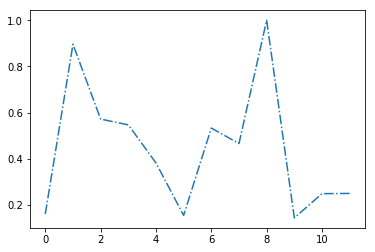

17 index,  time 6.082249999999999


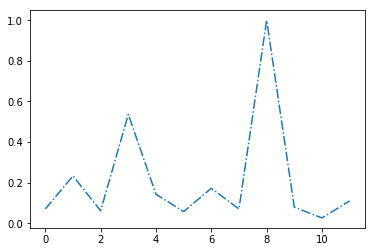

18 index,  time 6.345059999999999


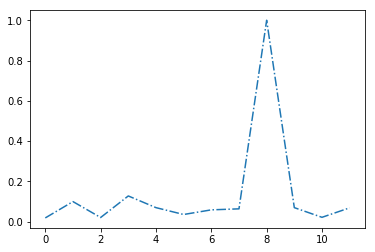

19 index,  time 6.7227


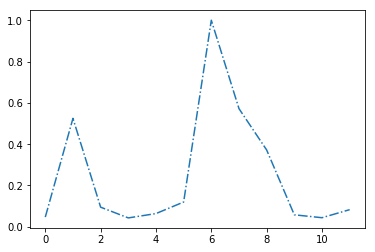

20 index,  time 7.04066


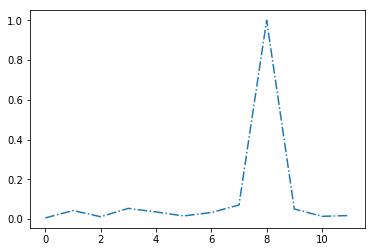

21 index,  time 7.41404


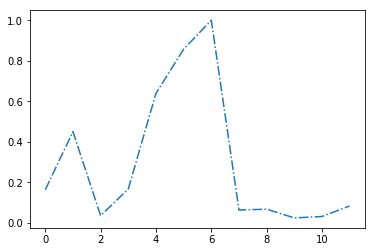

22 index,  time 7.95862


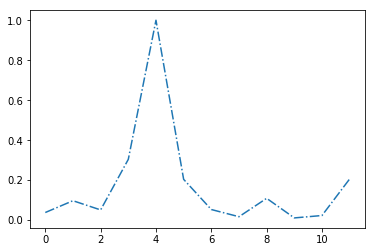

23 index,  time 8.16751


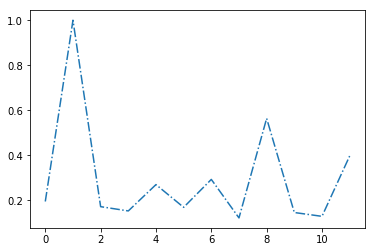

24 index,  time 8.34452


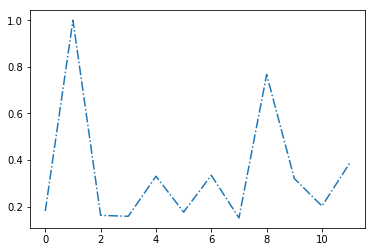

25 index,  time 8.95563


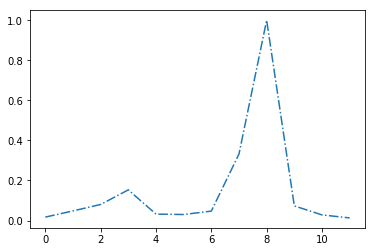

26 index,  time 9.090549999999999


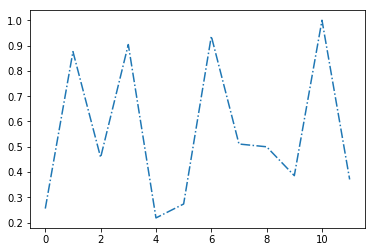

27 index,  time 9.346009999999998


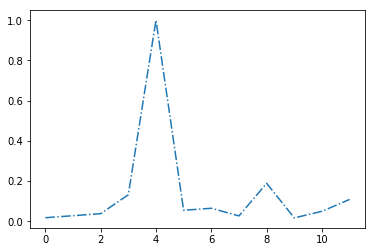

28 index,  time 9.712089999999998


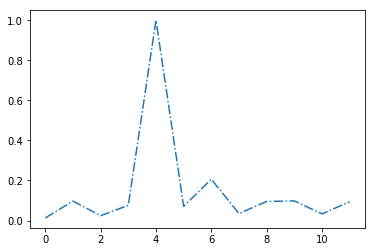

29 index,  time 10.054579999999998


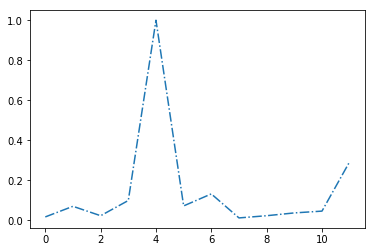

30 index,  time 10.333579999999998


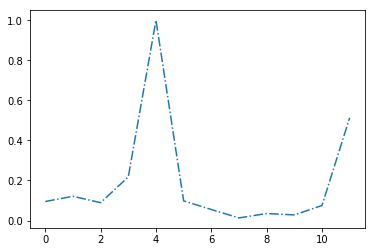

31 index,  time 10.763059999999998


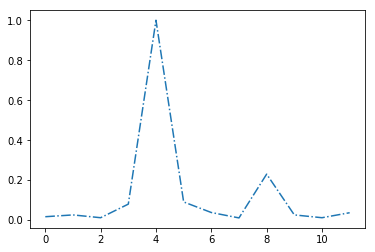

32 index,  time 11.089049999999997


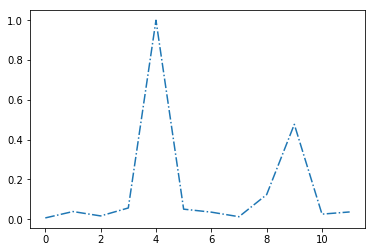

33 index,  time 11.377579999999996


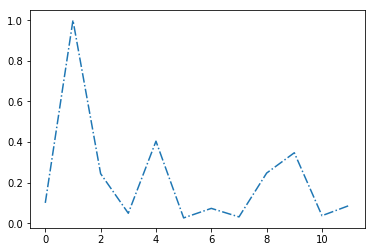

34 index,  time 11.934269999999996


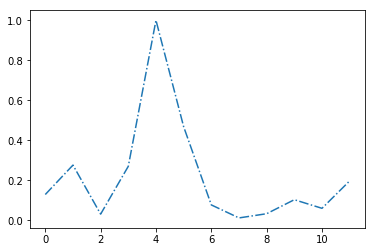

35 index,  time 12.016399999999996


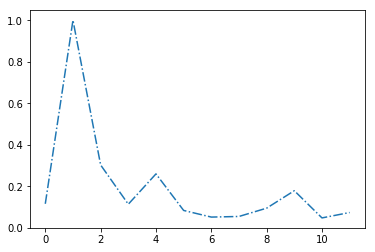

36 index,  time 12.347509999999996


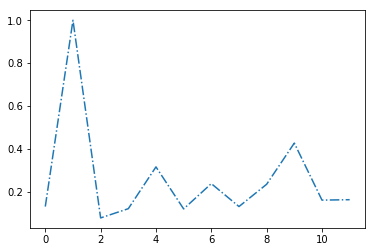

37 index,  time 13.061929999999997


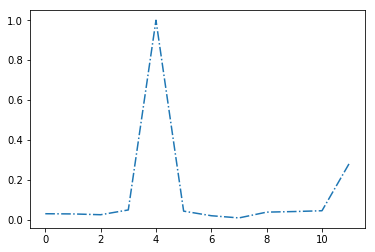

38 index,  time 13.421109999999997


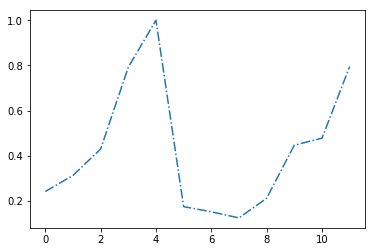

39 index,  time 13.717119999999998


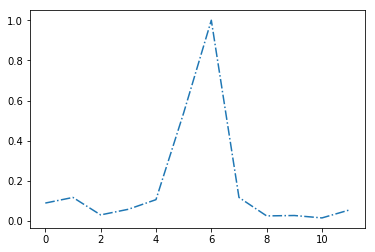

40 index,  time 14.349909999999998


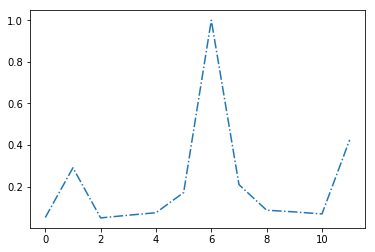

41 index,  time 14.582199999999998


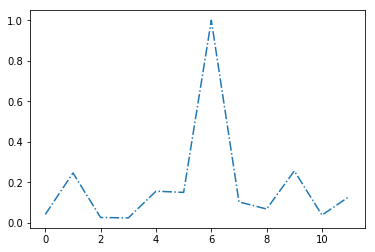

42 index,  time 15.064789999999999


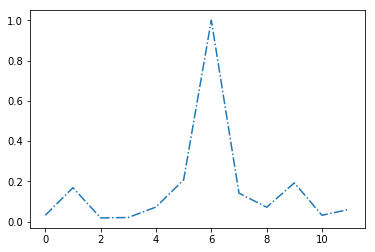

43 index,  time 15.331639999999998


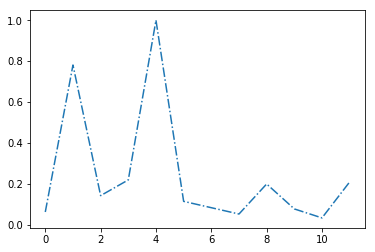

44 index,  time 15.434629999999999


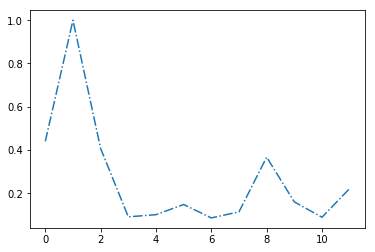

45 index,  time 15.998759999999999


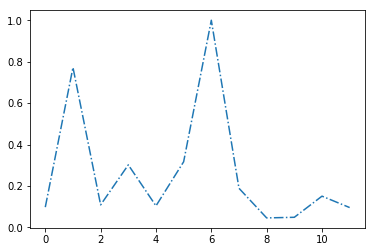

46 index,  time 16.38842


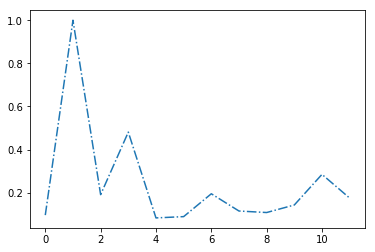

47 index,  time 16.7584


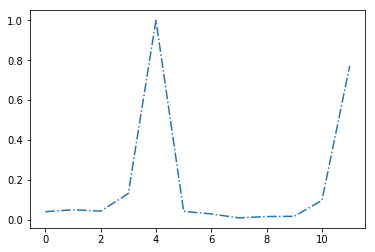

48 index,  time 17.037670000000002


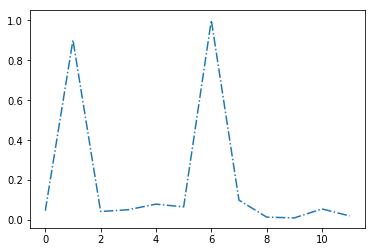

49 index,  time 17.403340000000004


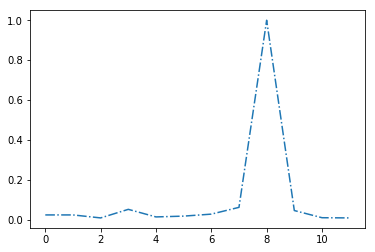

50 index,  time 17.746830000000003


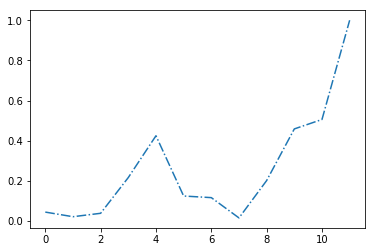

51 index,  time 18.053590000000003


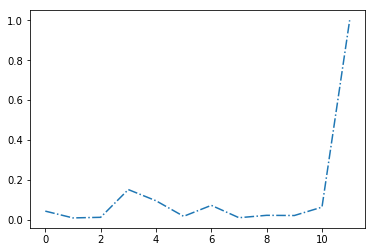

52 index,  time 18.411870000000004


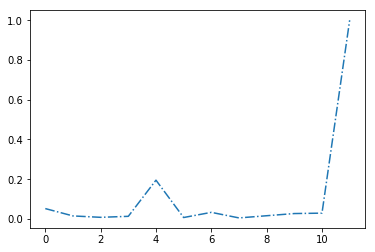

53 index,  time 18.761080000000003


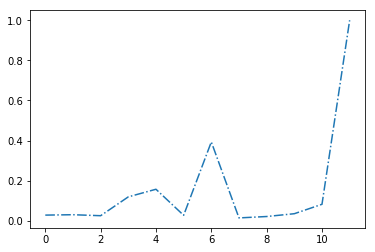

54 index,  time 19.022300000000005


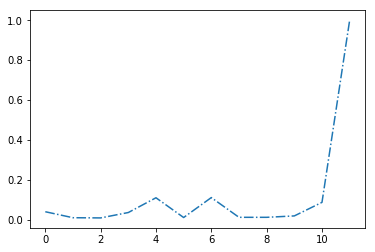

55 index,  time 19.446290000000005


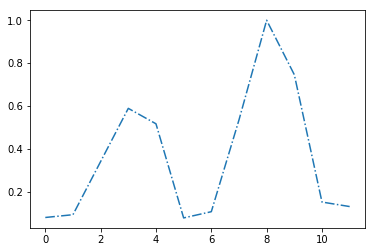

56 index,  time 19.735180000000003


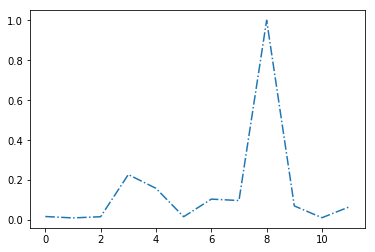

57 index,  time 19.846290000000003


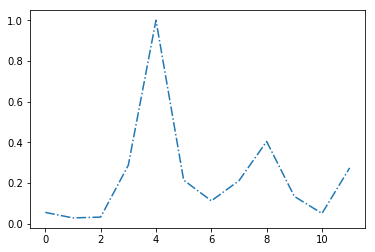

58 index,  time 19.941390000000002


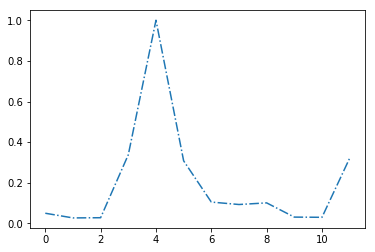

59 index,  time 20.015680000000003


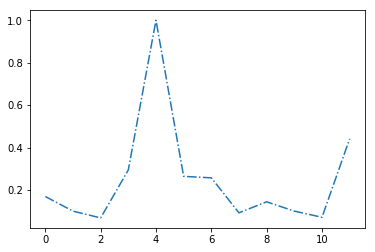

60 index,  time 20.32334


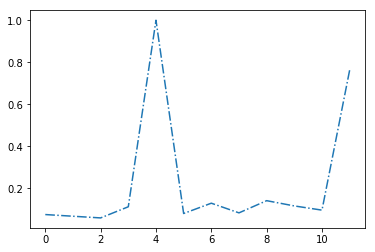

61 index,  time 20.427650000000003


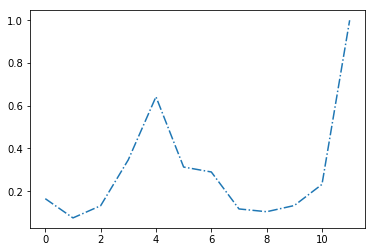

62 index,  time 20.776310000000002


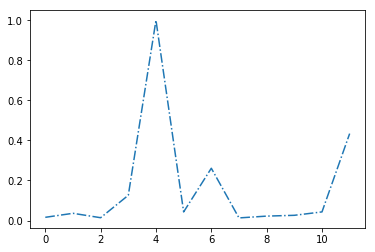

63 index,  time 21.049280000000003


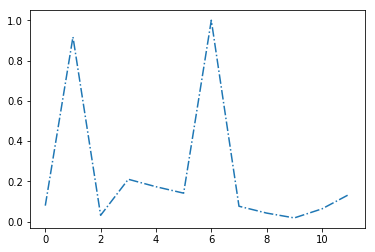

64 index,  time 21.293000000000003


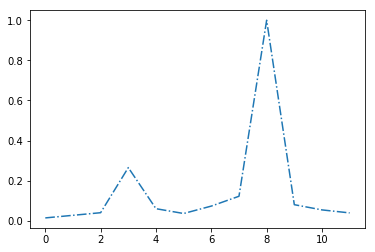

65 index,  time 21.38547


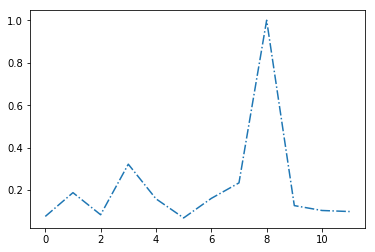

66 index,  time 21.751910000000002


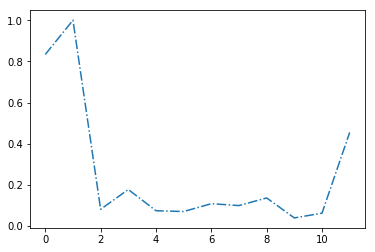

67 index,  time 22.089280000000002


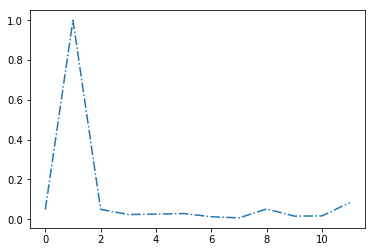

68 index,  time 22.413040000000002


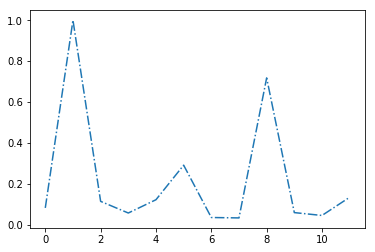

69 index,  time 22.587960000000002


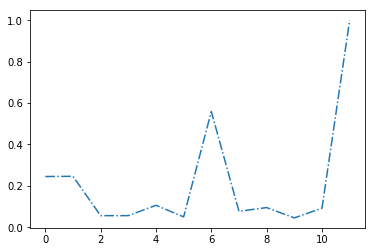

70 index,  time 22.80279


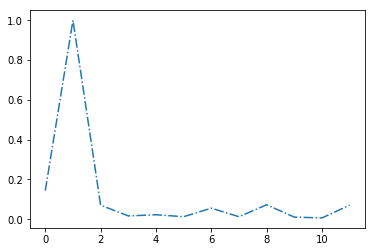

71 index,  time 23.04079


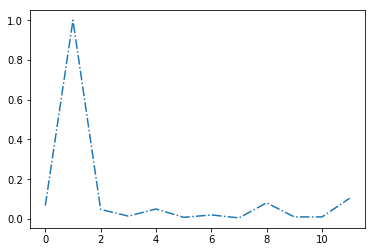

72 index,  time 23.4178


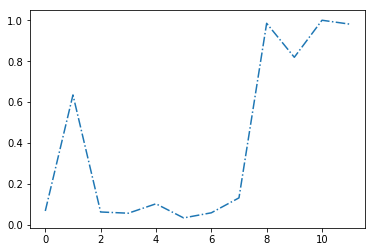

73 index,  time 24.09104


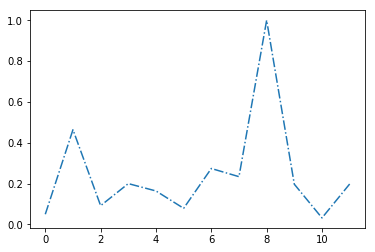

74 index,  time 24.357029999999998


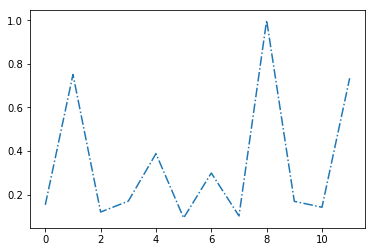

75 index,  time 24.711949999999998


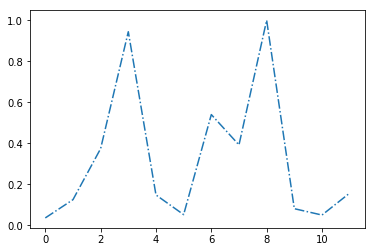

76 index,  time 25.083239999999996


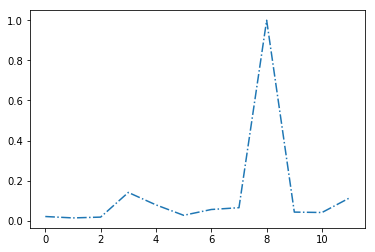

77 index,  time 25.344239999999996


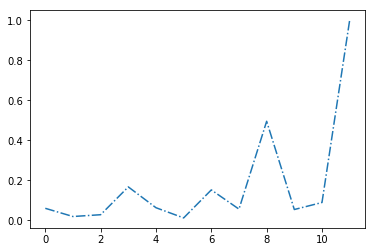

78 index,  time 25.560109999999995


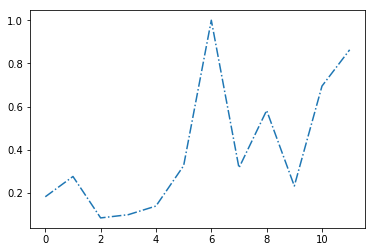

79 index,  time 25.717029999999994


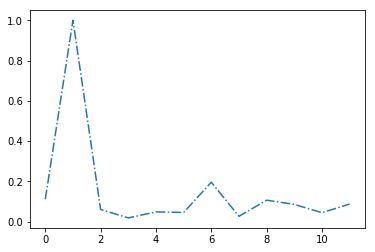

80 index,  time 26.105239999999995


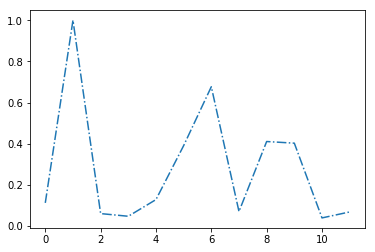

81 index,  time 26.371589999999994


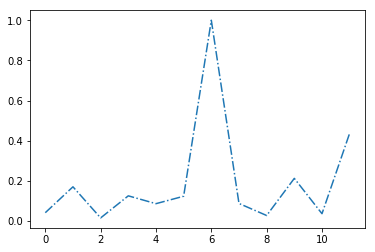

82 index,  time 26.721069999999994


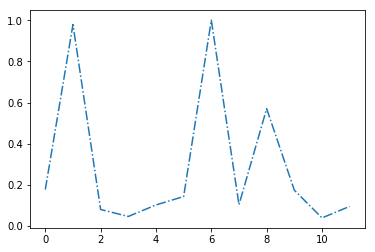

83 index,  time 27.062699999999992


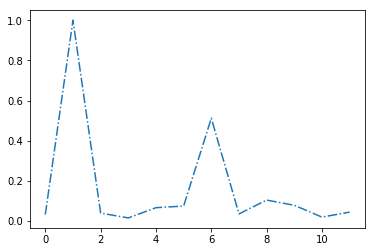

84 index,  time 27.265099999999993


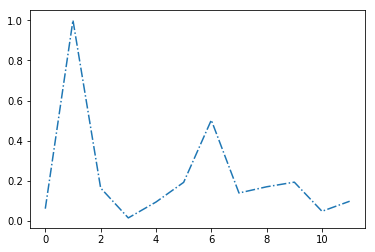

85 index,  time 27.405419999999992


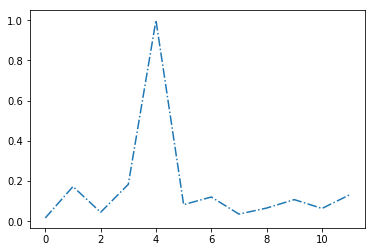

86 index,  time 27.90414999999999


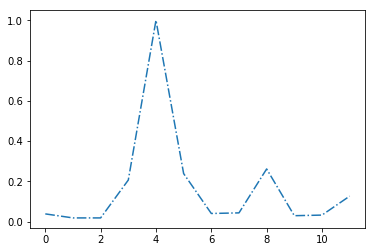

87 index,  time 28.04958999999999


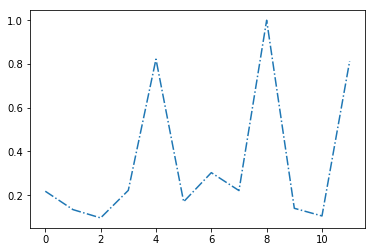

88 index,  time 28.350719999999992


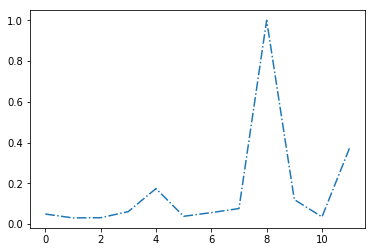

89 index,  time 28.71729999999999


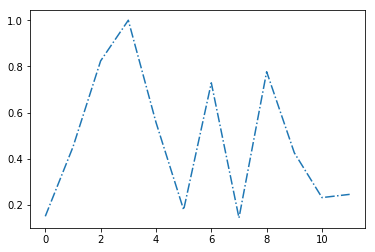

90 index,  time 29.04192999999999


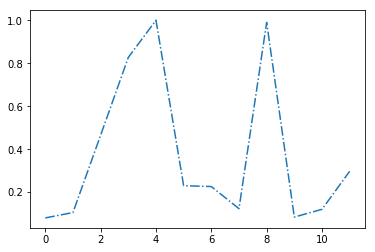

91 index,  time 29.38423999999999


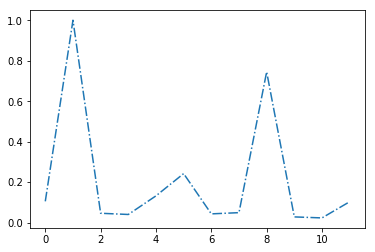

92 index,  time 29.709459999999993


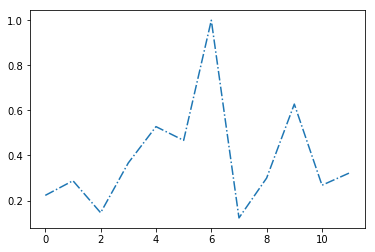

93 index,  time 29.803069999999995


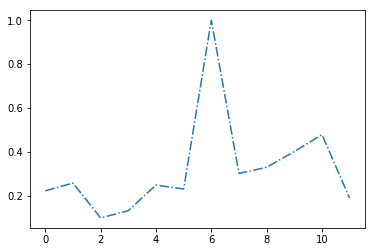

94 index,  time 30.023749999999996


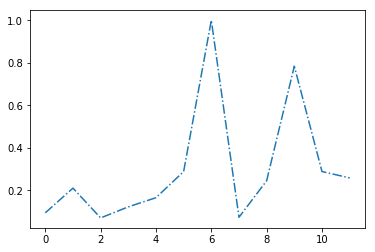

95 index,  time 30.365019999999998


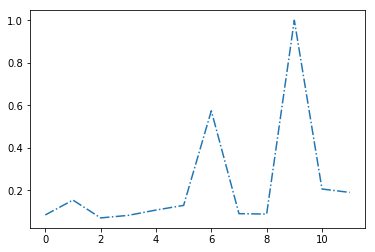

96 index,  time 30.655179999999998


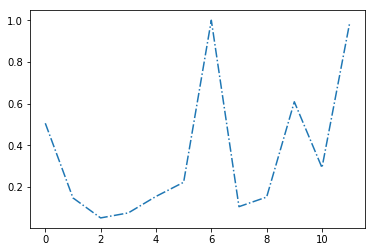

97 index,  time 31.021759999999997


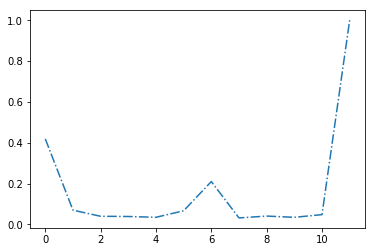

98 index,  time 31.271189999999997


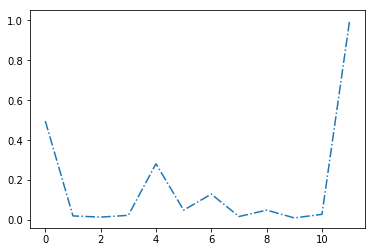

99 index,  time 31.376219999999996


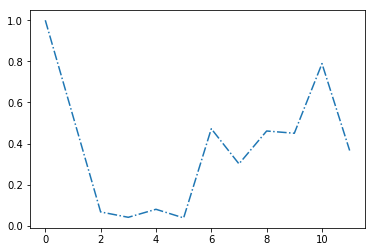

In [274]:
for i in range(100):
    print(i, 'index, ', 'time', duration.cumsum()[i])
    plt.plot(pitches[i], '-.')
    plt.show()

In [291]:
pitches[4]

array([0.031, 0.161, 0.161, 0.195, 0.592, 0.21 , 0.621, 1.   , 0.965,
       0.051, 0.061, 0.296])

In [298]:
timbre = []
for i in segments:
    timbre.append(i['timbre'])
timbre = np.array(timbre)

In [322]:
timbre_basis = np.concatenate(
    (timbre[:,0].reshape(-1,1), 
     timbre[:,1:4].sum(axis=1).reshape(-1,1), 
     timbre[:,4:].sum(axis=1).reshape(-1,1)), axis=1
)

In [323]:
timbre_basis

array([[   0.158,  140.45 ,  -21.58 ],
       [  28.1  ,   21.944,  157.074],
       [  35.606,   27.262, -126.444],
       ...,
       [  19.605, -145.077,  -91.84 ],
       [  18.453, -120.775, -107.945],
       [   7.546,    6.42 ,  -59.14 ]])

In [330]:
# 归一化到0-1之间
k = 1/(timbre_basis.max() - timbre_basis.min())
b = 1*timbre_basis.min()/(timbre_basis.min() - timbre_basis.max())
timbre_basis = k * timbre_basis + b

0 index,  time 0.34222


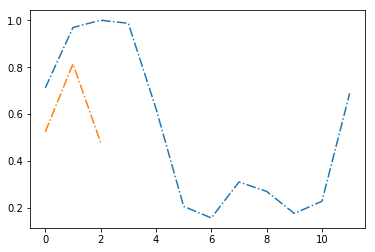

1 index,  time 0.73723


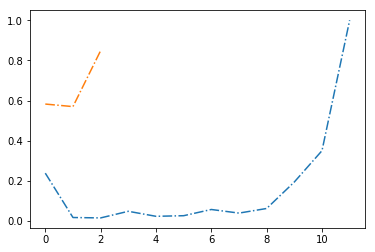

2 index,  time 1.0804500000000001


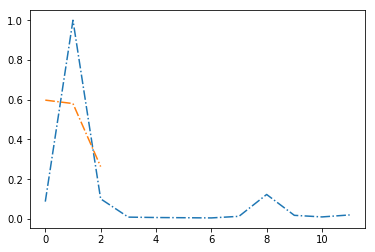

3 index,  time 1.4221300000000001


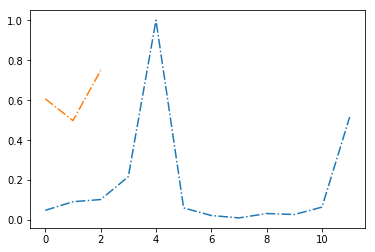

4 index,  time 1.75818


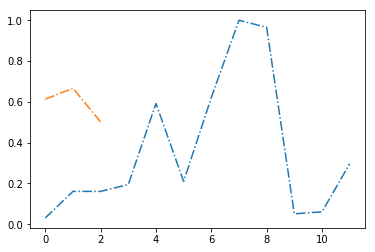

5 index,  time 2.09491


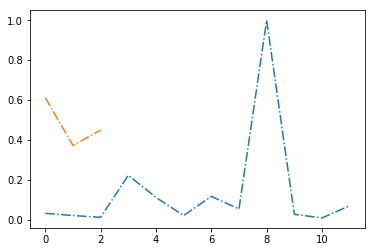

6 index,  time 2.36852


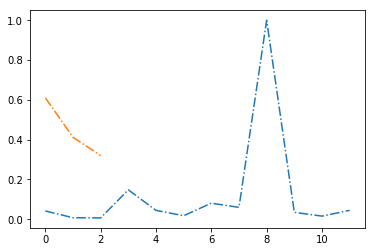

7 index,  time 2.77455


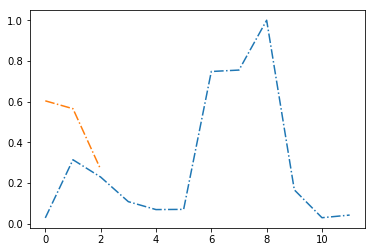

8 index,  time 3.01863


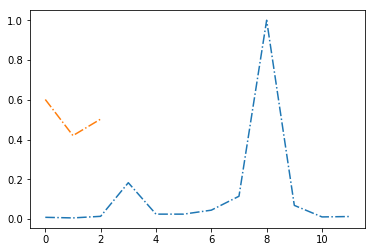

9 index,  time 3.37119


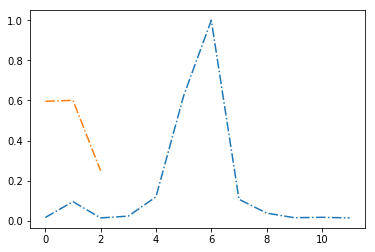

10 index,  time 3.94135


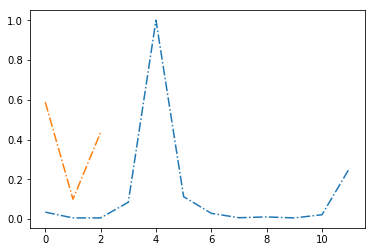

11 index,  time 4.10992


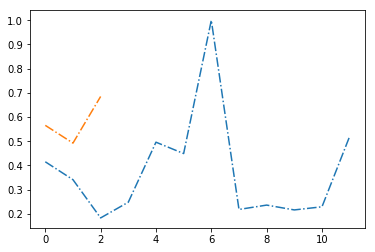

12 index,  time 4.41799


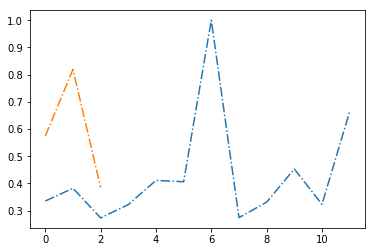

13 index,  time 4.736809999999999


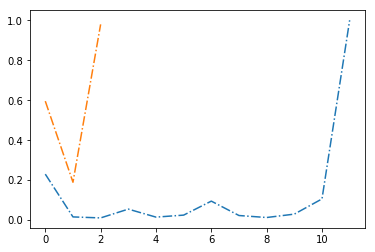

14 index,  time 5.0723199999999995


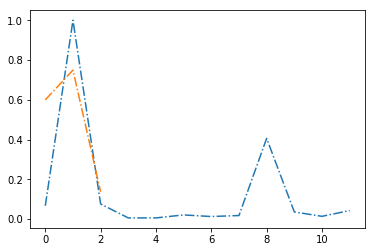

15 index,  time 5.416269999999999


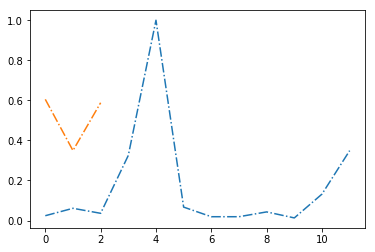

16 index,  time 5.746879999999999


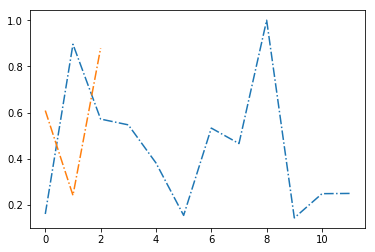

17 index,  time 6.082249999999999


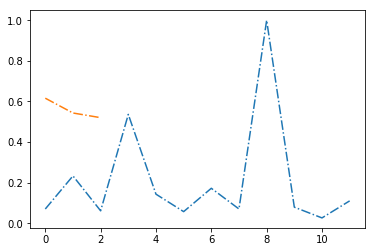

18 index,  time 6.345059999999999


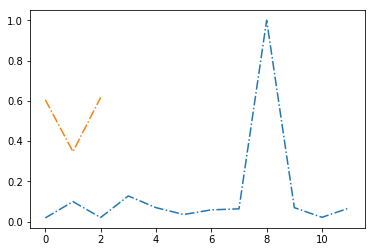

19 index,  time 6.7227


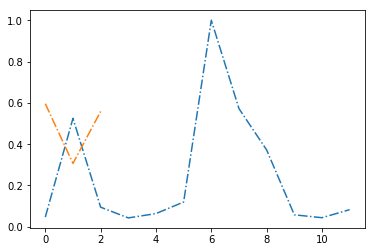

20 index,  time 7.04066


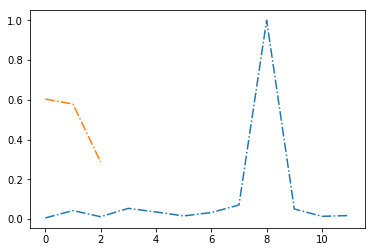

21 index,  time 7.41404


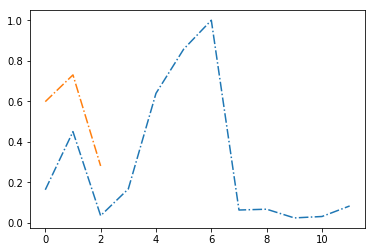

22 index,  time 7.95862


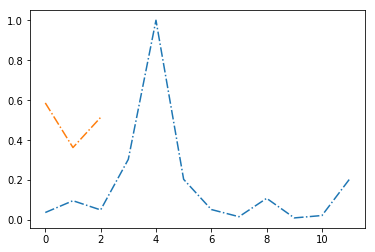

23 index,  time 8.16751


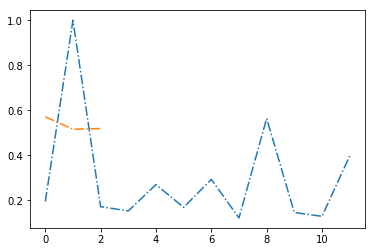

24 index,  time 8.34452


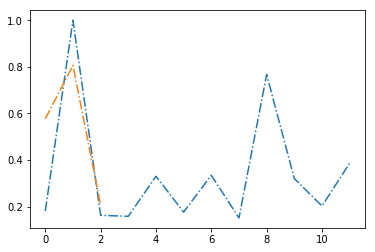

25 index,  time 8.95563


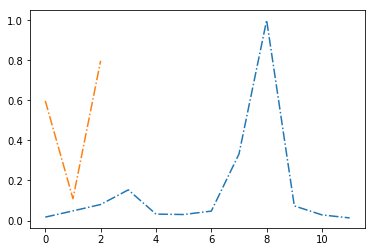

26 index,  time 9.090549999999999


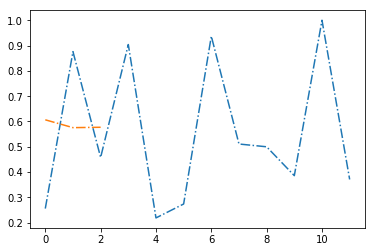

27 index,  time 9.346009999999998


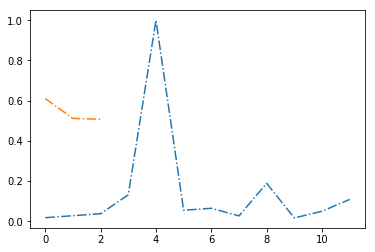

28 index,  time 9.712089999999998


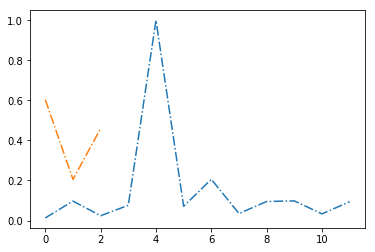

29 index,  time 10.054579999999998


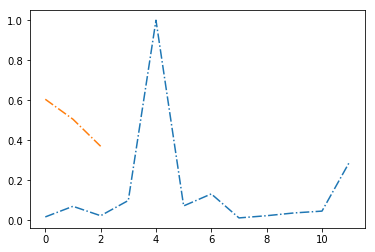

30 index,  time 10.333579999999998


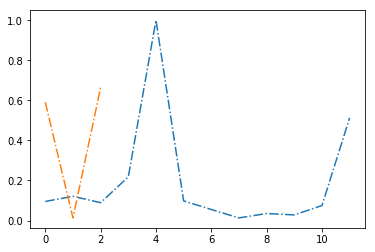

31 index,  time 10.763059999999998


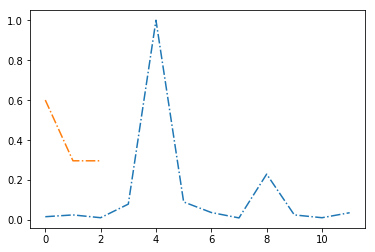

32 index,  time 11.089049999999997


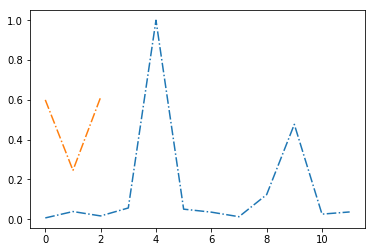

33 index,  time 11.377579999999996


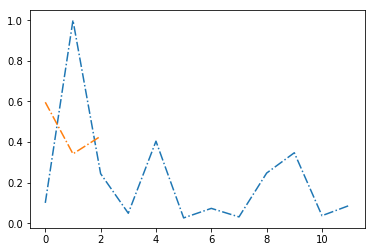

34 index,  time 11.934269999999996


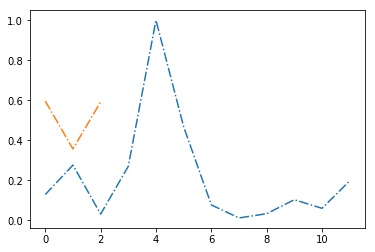

35 index,  time 12.016399999999996


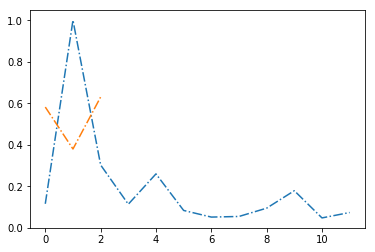

36 index,  time 12.347509999999996


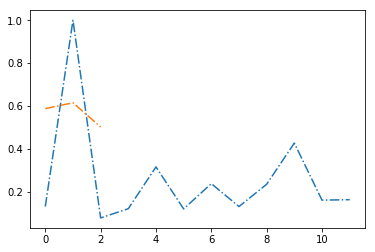

37 index,  time 13.061929999999997


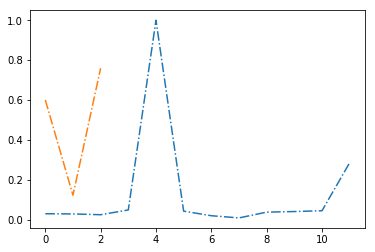

38 index,  time 13.421109999999997


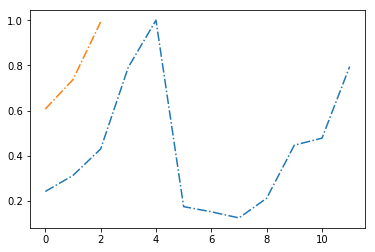

39 index,  time 13.717119999999998


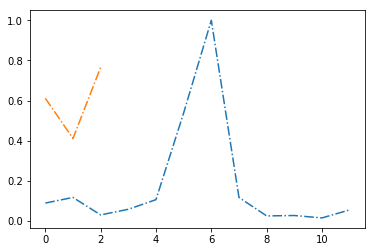

40 index,  time 14.349909999999998


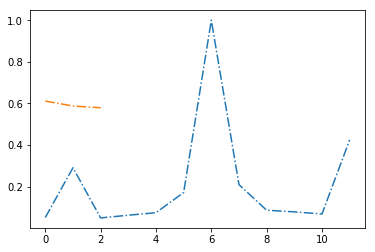

41 index,  time 14.582199999999998


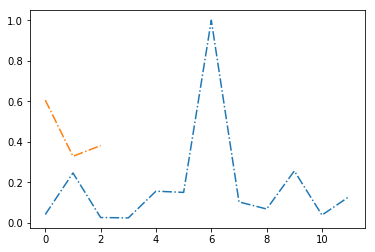

42 index,  time 15.064789999999999


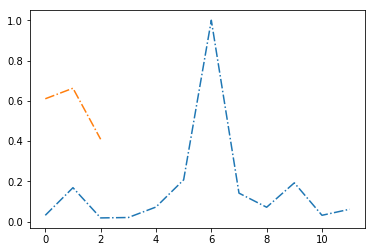

43 index,  time 15.331639999999998


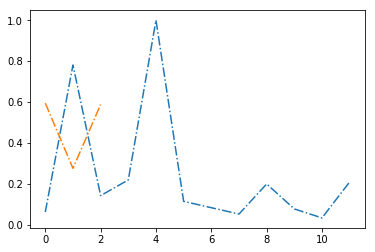

44 index,  time 15.434629999999999


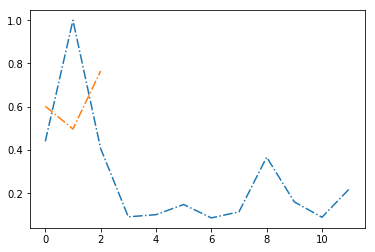

45 index,  time 15.998759999999999


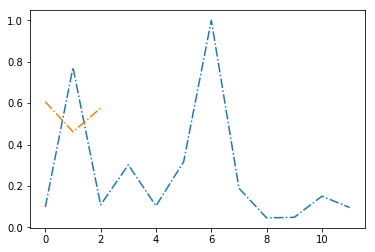

46 index,  time 16.38842


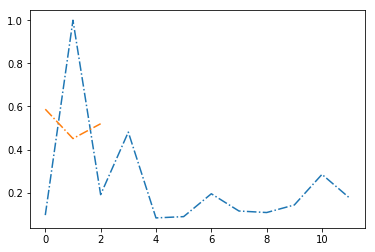

47 index,  time 16.7584


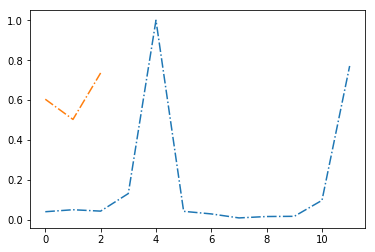

48 index,  time 17.037670000000002


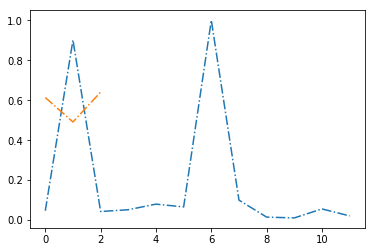

49 index,  time 17.403340000000004


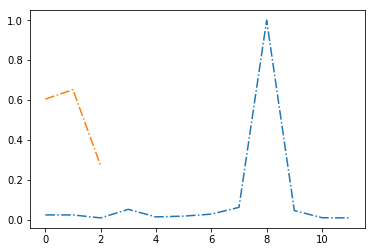

50 index,  time 17.746830000000003


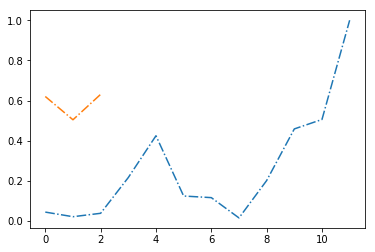

51 index,  time 18.053590000000003


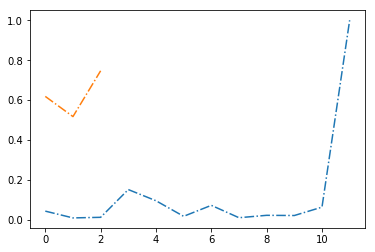

52 index,  time 18.411870000000004


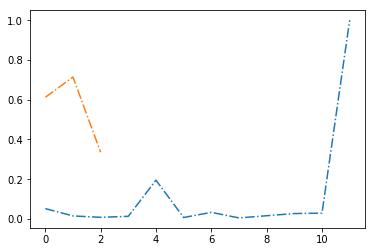

53 index,  time 18.761080000000003


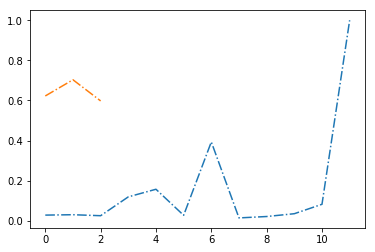

54 index,  time 19.022300000000005


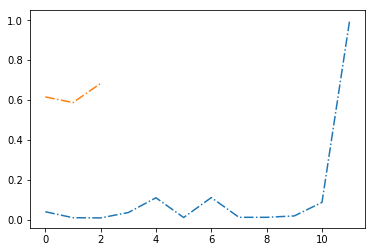

55 index,  time 19.446290000000005


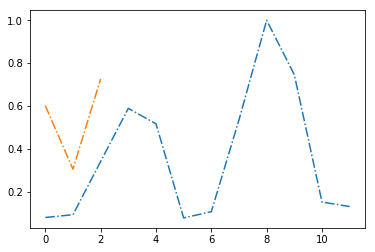

56 index,  time 19.735180000000003


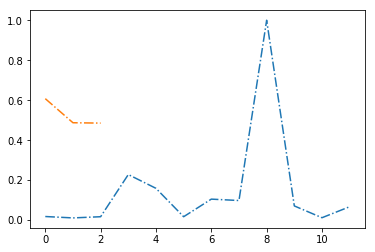

57 index,  time 19.846290000000003


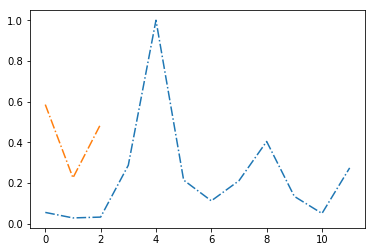

58 index,  time 19.941390000000002


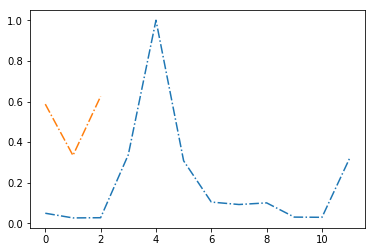

59 index,  time 20.015680000000003


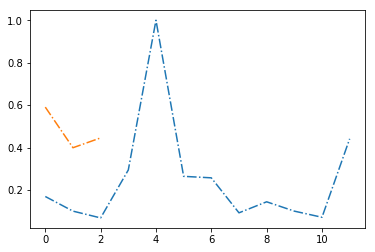

60 index,  time 20.32334


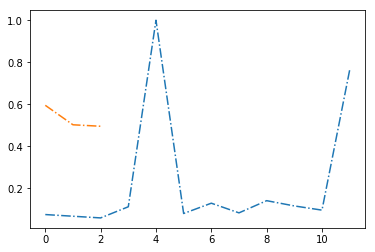

61 index,  time 20.427650000000003


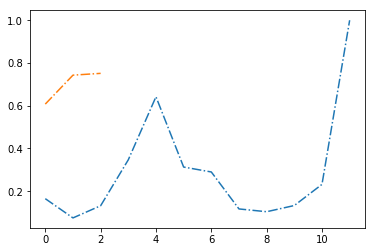

62 index,  time 20.776310000000002


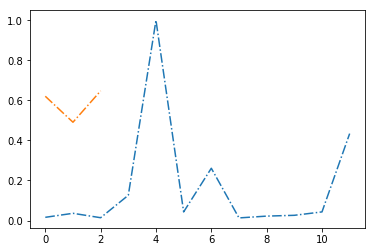

63 index,  time 21.049280000000003


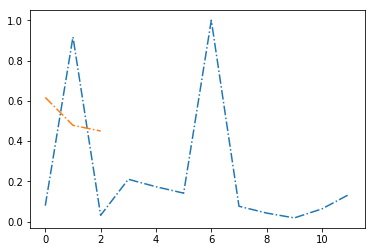

64 index,  time 21.293000000000003


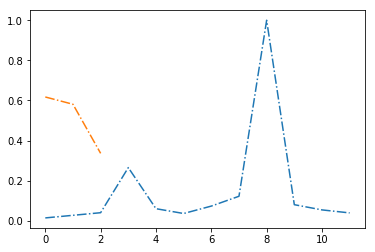

65 index,  time 21.38547


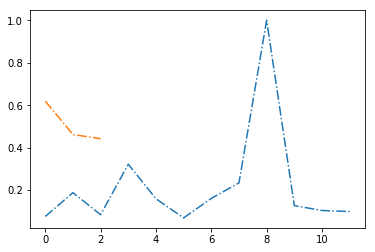

66 index,  time 21.751910000000002


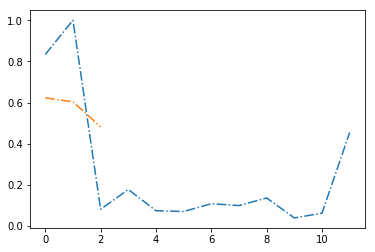

67 index,  time 22.089280000000002


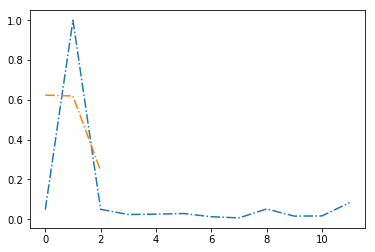

68 index,  time 22.413040000000002


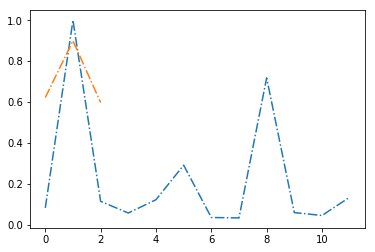

69 index,  time 22.587960000000002


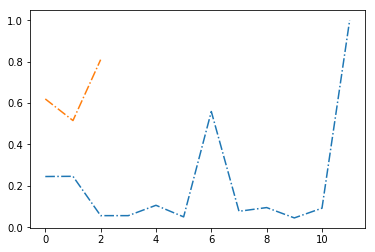

70 index,  time 22.80279


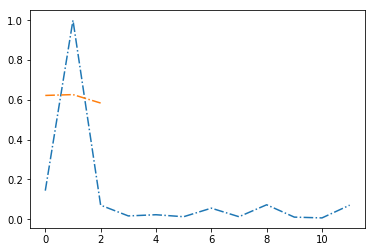

71 index,  time 23.04079


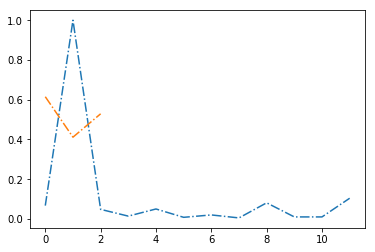

72 index,  time 23.4178


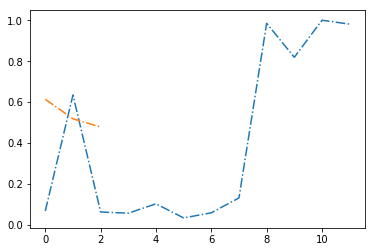

73 index,  time 24.09104


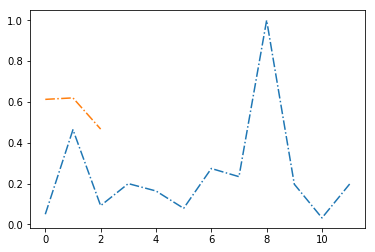

74 index,  time 24.357029999999998


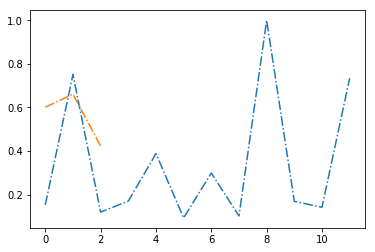

75 index,  time 24.711949999999998


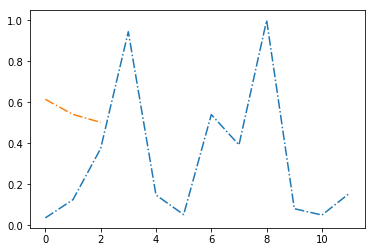

76 index,  time 25.083239999999996


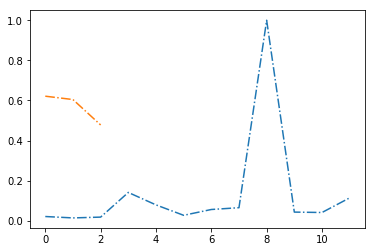

77 index,  time 25.344239999999996


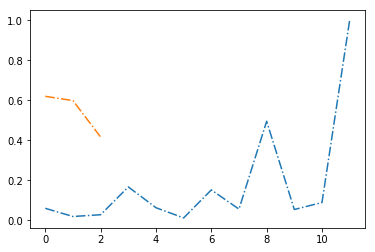

78 index,  time 25.560109999999995


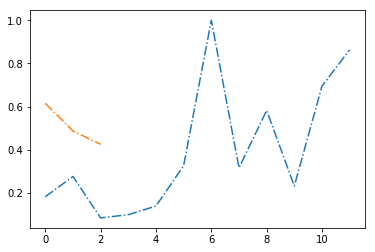

79 index,  time 25.717029999999994


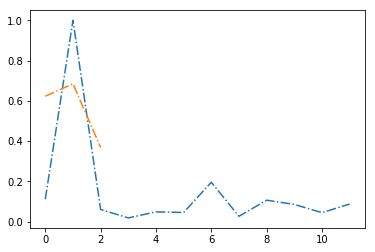

80 index,  time 26.105239999999995


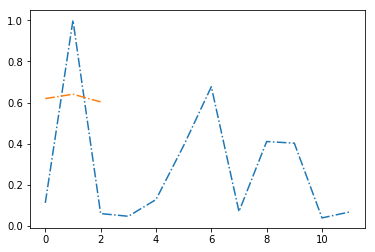

81 index,  time 26.371589999999994


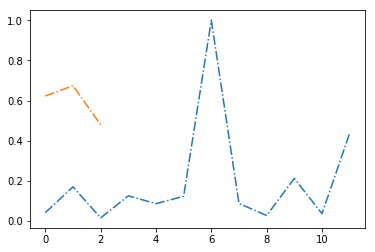

82 index,  time 26.721069999999994


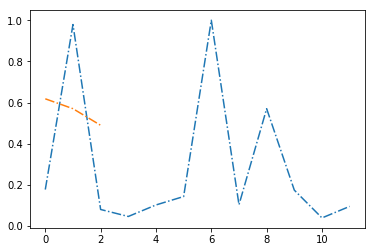

83 index,  time 27.062699999999992


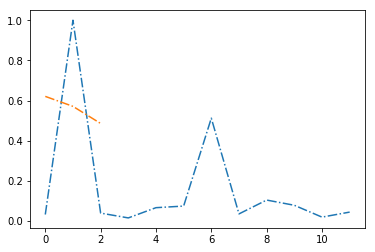

84 index,  time 27.265099999999993


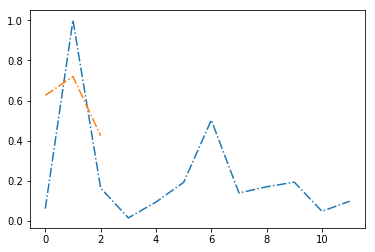

85 index,  time 27.405419999999992


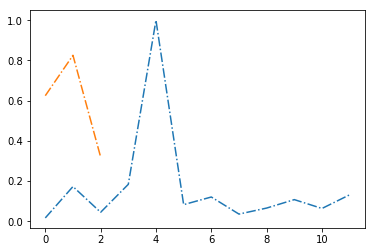

86 index,  time 27.90414999999999


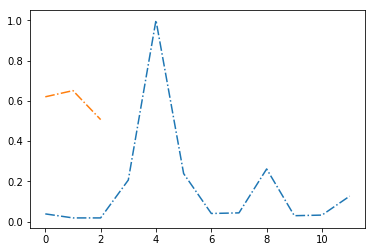

87 index,  time 28.04958999999999


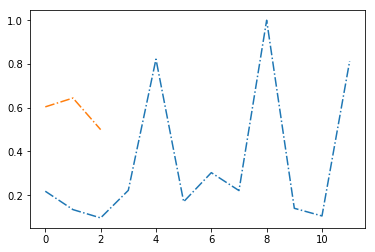

88 index,  time 28.350719999999992


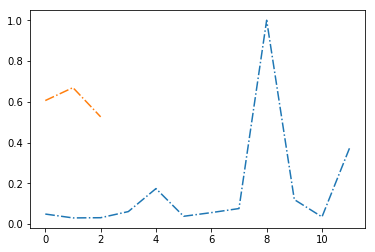

89 index,  time 28.71729999999999


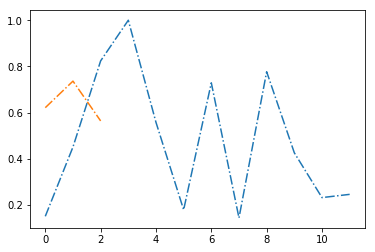

90 index,  time 29.04192999999999


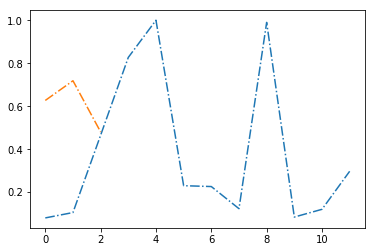

91 index,  time 29.38423999999999


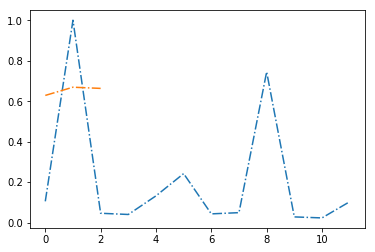

92 index,  time 29.709459999999993


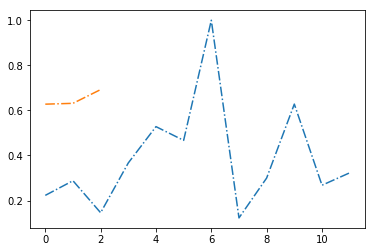

93 index,  time 29.803069999999995


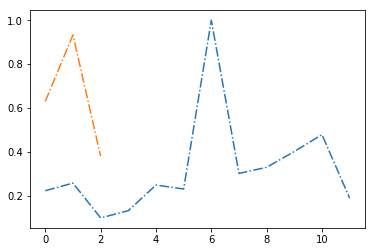

94 index,  time 30.023749999999996


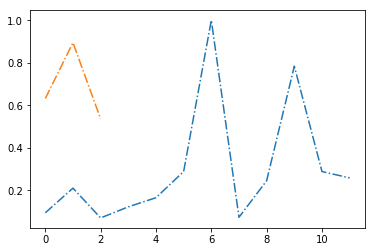

95 index,  time 30.365019999999998


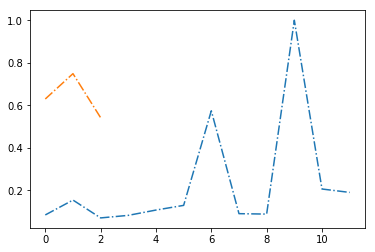

96 index,  time 30.655179999999998


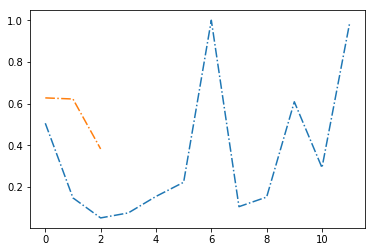

97 index,  time 31.021759999999997


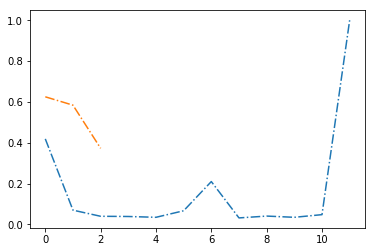

98 index,  time 31.271189999999997


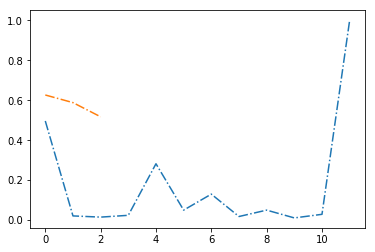

99 index,  time 31.376219999999996


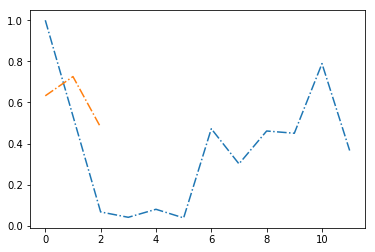

In [334]:
for i in range(100):
    print(i, 'index, ', 'time', duration.cumsum()[i])    
    plt.plot(pitches[i], '-.')    
    plt.plot(timbre_basis[i], '-.')
    plt.show()

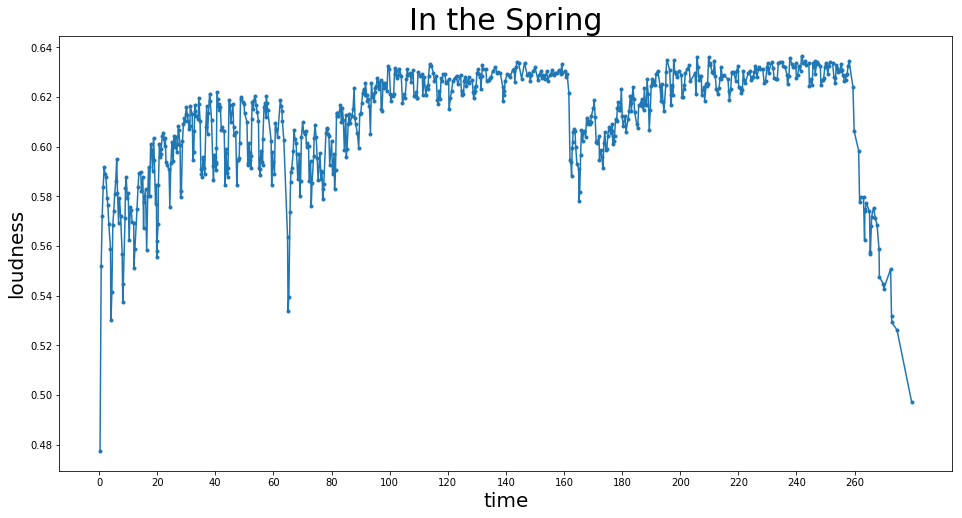

In [164]:
plt.figure(figsize=(16,8))
plt.plot(duration.cumsum(), timbre[:,0], '.-')
plt.xticks(np.arange(0,duration.cumsum()[-1], step=20), rotation=0)
plt.xlabel('time', fontsize=20)
plt.ylabel('loudness', fontsize=20)
plt.title('In the Spring', fontsize=30)
plt.show()

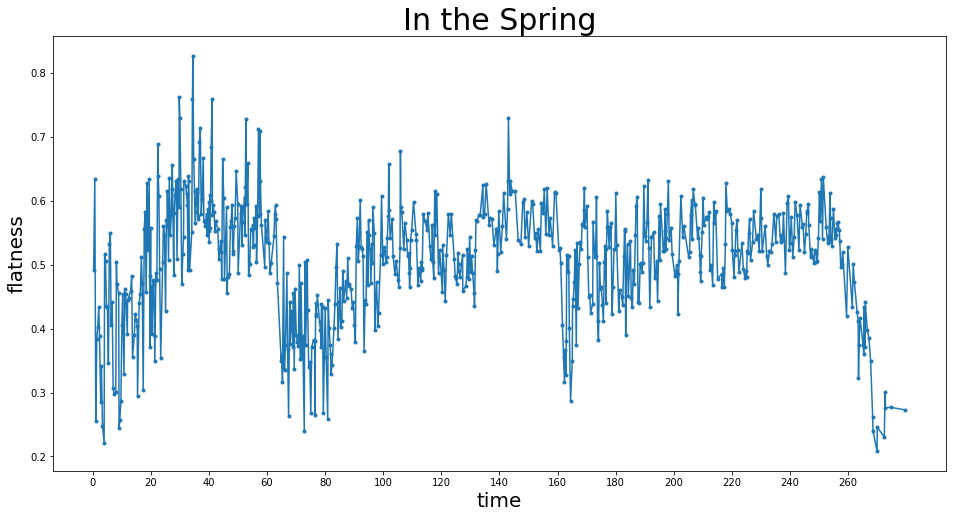

In [169]:
plt.figure(figsize=(16,8))
plt.plot(duration.cumsum(), timbre[:,2], '.-')
plt.xticks(np.arange(0,duration.cumsum()[-1], step=20), rotation=0)
plt.xlabel('time', fontsize=20)
plt.ylabel('flatness', fontsize=20)
plt.title('In the Spring', fontsize=30)
plt.show()